# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations and Insights

### Analysis

    1.On the overall, most cities analysed are from the northern hemisphere.
    That is, 378 of the 548 random cities selected when the code  was last executed
    2.The scatter plots of latitude vs. temperature shows a negative relationship between the latitude of the cities and their corresponding temperature. However, the scatter plots of latitude and humidity shows that there is a positive relationship between the latitude of the cities and their corresponding humidity values
    3. The correlation figures for both northern and southern hemispheres mostly show weak correlations, except for Max Temp and Latitude in the northern hemisphere which has a strong correlation of 0.75. 
    


In [1]:
# Import all dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
from scipy.stats import linregress
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Print Cities List
print(cities)

['dikson', 'bluff', 'antalaha', 'barrow', 'ushuaia', 'tiksi', 'punta arenas', 'busselton', 'constitucion', 'lorengau', 'luanda', 'severo-kurilsk', 'hovd', 'itarema', 'vaini', 'hermanus', 'zhangjiakou', 'touros', 'qaanaaq', 'tecoanapa', 'rikitea', 'mabamba', 'mahebourg', 'olafsvik', 'atuona', 'port elizabeth', 'mataura', 'tasiilaq', 'guerrero negro', 'westport', 'victoria', 'kalmar', 'axim', 'pisco', 'taolanaro', 'pinawa', 'tabialan', 'lavrentiya', 'vlakhopoulon', 'cabo san lucas', 'hobart', 'bengkulu', 'nikolskoye', 'caravelas', 'cape town', 'tiznit', 'chuy', 'vila velha', 'traverse city', 'jamestown', 'ouesso', 'jaque', 'nanortalik', 'svetlyy', 'maceio', 'umzimvubu', 'airai', 'illoqqortoormiut', 'praya', 'thompson', 'acajutla', 'maarianhamina', 'kapaa', 'mar del plata', 'hilo', 'bandarbeyla', 'lagoa', 'ouadda', 'chokurdakh', 'esperance', 'safaqis', 'clyde river', 'albany', 'saint george', 'gat', 'bethel', 'butaritari', 'wageningen', 'longyearbyen', 'kudymkar', 'pafos', 'at-bashi', 'vi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Components of API 
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Initializze a counter to store the city number
counter = 1

# Perform a weather check 
# on each of the cities using a series of successive API calls
# Then, extract the weather components (latitude, temperature, wind speed..)
# needed for our analyses and chats
for city in cities:
    try:
        query_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
        weather_response = requests.get(query_url).json()
        city_humidity = weather_response["main"]["humidity"]
        city_temp = weather_response["main"]["temp"]
        city_Maxtemp = weather_response["main"]["temp_max"]
        city_lat = weather_response["coord"]["lat"]
        city_wind = weather_response["wind"]["speed"]
        city_cloud = weather_response["clouds"]["all"]
        city_country = weather_response["sys"]["country"]
        city_datetime = weather_response["dt"]
        
        # Print a log of each city with the city number and city name
        print(f"processing record number {counter} | {city}")
        counter += 1
        city_data.append ({"City":city,
                           "Country": city_country,
                           "DateTime":city_datetime,
                           "Humidity": city_humidity,
                           "Temperature": city_temp,
                           "Max. Temp.":  city_Maxtemp,
                           "Latitude": city_lat,
                           "WindSpeed": city_wind,
                           "Cloudiness": city_cloud  
                     })        
    except:
        # Print city does not exist, if the city details are missing
        print("City does not exist")
        pass

processing record number 1 | dikson
processing record number 2 | bluff
processing record number 3 | antalaha
processing record number 4 | barrow
processing record number 5 | ushuaia
processing record number 6 | tiksi
processing record number 7 | punta arenas
processing record number 8 | busselton
processing record number 9 | constitucion
processing record number 10 | lorengau
processing record number 11 | luanda
processing record number 12 | severo-kurilsk
processing record number 13 | hovd
processing record number 14 | itarema
processing record number 15 | vaini
processing record number 16 | hermanus
processing record number 17 | zhangjiakou
processing record number 18 | touros
processing record number 19 | qaanaaq
processing record number 20 | tecoanapa
processing record number 21 | rikitea
processing record number 22 | mabamba
processing record number 23 | mahebourg
processing record number 24 | olafsvik
processing record number 25 | atuona
processing record number 26 | port elizabe

processing record number 198 | norman wells
processing record number 199 | sobolevo
processing record number 200 | praia da vitoria
processing record number 201 | aklavik
processing record number 202 | cidreira
processing record number 203 | jorochito
processing record number 204 | sitka
processing record number 205 | dingle
processing record number 206 | arona
processing record number 207 | amapa
processing record number 208 | luderitz
processing record number 209 | sakakah
processing record number 210 | howard
processing record number 211 | baishishan
processing record number 212 | columbus
processing record number 213 | santa isabel do rio negro
processing record number 214 | zhmerynka
processing record number 215 | kirakira
processing record number 216 | ponta delgada
processing record number 217 | camana
processing record number 218 | talara
processing record number 219 | turkan
processing record number 220 | lebu
processing record number 221 | timbiqui
processing record number 22

processing record number 399 | taldan
City does not exist
processing record number 400 | andenes
processing record number 401 | bayan
processing record number 402 | faanui
processing record number 403 | muisne
processing record number 404 | shar
processing record number 405 | gigmoto
processing record number 406 | pingshan
processing record number 407 | sinnar
processing record number 408 | atocha
processing record number 409 | barabinsk
processing record number 410 | hargeysa
processing record number 411 | kropotkin
processing record number 412 | meulaboh
processing record number 413 | namatanai
processing record number 414 | dicabisagan
processing record number 415 | wagar
processing record number 416 | erie
processing record number 417 | douentza
processing record number 418 | avera
processing record number 419 | gazojak
processing record number 420 | kabompo
processing record number 421 | the valley
processing record number 422 | farah
processing record number 423 | camocim
process

In [5]:
weather_response

{'coord': {'lon': 72.52, 'lat': 65.53},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': -0.33,
  'feels_like': -7.8,
  'temp_min': -0.33,
  'temp_max': -0.33,
  'pressure': 1000,
  'humidity': 99,
  'sea_level': 1000,
  'grnd_level': 999},
 'visibility': 90,
 'wind': {'speed': 7.74, 'deg': 166},
 'clouds': {'all': 100},
 'dt': 1604634102,
 'sys': {'country': 'RU', 'sunrise': 1604632792, 'sunset': 1604658435},
 'timezone': 18000,
 'id': 1498087,
 'name': 'Nadym',
 'cod': 200}

In [6]:
# Convert city_data to DataFrame
city_data = pd.DataFrame(city_data)
city_data

# Export the city data into a .csv 
city_data.to_csv(output_data_file, encoding="utf-8", index=False)
city_data

,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness
0,dikson,RU,1604633899,91,-18.12,-18.12,73.51,1.15,0
1,bluff,NZ,1604633904,61,11.86,11.86,-46.60,4.16,0
2,antalaha,MG,1604633970,85,24.48,24.48,-14.90,3.50,47
3,barrow,US,1604633970,78,-9.00,-9.00,71.29,7.20,1
4,ushuaia,AR,1604633831,88,0.83,0.83,-54.80,1.60,8
...,...,...,...,...,...,...,...,...,...
541,eyl,SO,1604633935,60,24.16,24.16,7.98,3.82,8
542,thinadhoo,MV,1604634101,67,28.62,28.62,0.53,1.74,84
543,abaete,BR,1604634101,73,21.04,21.04,-19.16,0.80,27
544,kashi,CN,1604634102,28,7.00,7.00,39.45,4.00,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
len(city_data)

546

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Check the city_data for cities with humidity <= 100
clean_city_data = city_data.loc[(
    city_data["Humidity"] <= 100)]
clean_city_data

# The cities with humidity below or equal to 100 
# are still the same cities in our original datasets

,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness
0,dikson,RU,1604633899,91,-18.12,-18.12,73.51,1.15,0
1,bluff,NZ,1604633904,61,11.86,11.86,-46.60,4.16,0
2,antalaha,MG,1604633970,85,24.48,24.48,-14.90,3.50,47
3,barrow,US,1604633970,78,-9.00,-9.00,71.29,7.20,1
4,ushuaia,AR,1604633831,88,0.83,0.83,-54.80,1.60,8
...,...,...,...,...,...,...,...,...,...
541,eyl,SO,1604633935,60,24.16,24.16,7.98,3.82,8
542,thinadhoo,MV,1604634101,67,28.62,28.62,0.53,1.74,84
543,abaete,BR,1604634101,73,21.04,21.04,-19.16,0.80,27
544,kashi,CN,1604634102,28,7.00,7.00,39.45,4.00,0


In [9]:
#  Get the indices of cities that have humidity over 100%.
reduced_city_data = city_data.loc[(
    city_data["Humidity"] > 100)]
reduced_city_data.index

# There is no city with humidity>100.
# So, this step and the next step are skipped

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

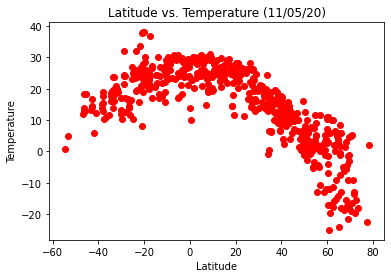

In [10]:
# Retrieve the latitude and temperature from city_data
latitude = city_data["Latitude"].tolist()
latitude
temperature = city_data["Temperature"].tolist()
temperature


# Plot the scatter diagram of latitude vs. temperature
plt.scatter(latitude, temperature, color = "red")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure1.png")

## Latitude vs. Humidity Plot

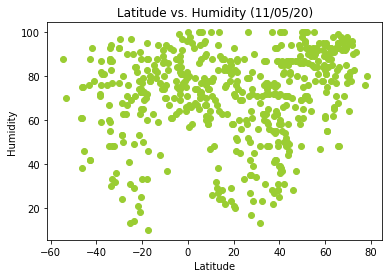

In [11]:
# Retrieve the humidity from city_data
humidity = city_data["Humidity"].tolist()
humidity

# Plot the scatter diagram of latitude vs. humidity
plt.scatter(latitude, humidity, color="yellowgreen")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure2.png")

## Latitude vs. Cloudiness Plot

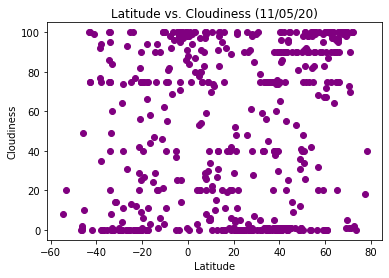

In [12]:
# Retrieve the cloudiness from city_data
cloudiness = city_data["Cloudiness"].tolist()
cloudiness

# Plot the scatter diagram of latitude vs. cloudiness
plt.scatter(latitude, cloudiness, color="purple")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure3.png")

## Latitude vs. Wind Speed Plot

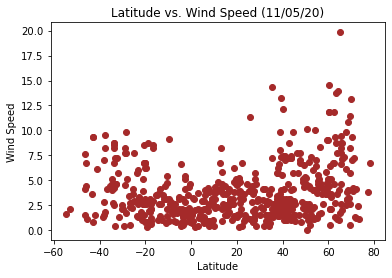

In [13]:
# Retrieve the wind speed from city_data
windspeed = city_data["WindSpeed"].tolist()
windspeed

# Plot the scatter diagram of latitude vs. wind speed
plt.scatter(latitude, windspeed, color="brown")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure4.png")

## Linear Regression

In [14]:
# Select data for Northern Hemisphere
North_city_data = city_data.loc[(
    city_data["Latitude"] >= 0)]
print(len(North_city_data))
North_city_data.head()

378


,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness
0,dikson,RU,1604633899,91,-18.12,-18.12,73.51,1.15,0
3,barrow,US,1604633970,78,-9.00,-9.00,71.29,7.20,1
5,tiksi,RU,1604633970,96,-13.45,-13.45,71.69,1.30,100
11,severo-kurilsk,RU,1604633972,79,2.49,2.49,50.68,10.12,91
12,hovd,MN,1604633972,61,3.93,3.93,48.01,0.80,81


In [15]:
# Select data for Southern Hemisphere
South_city_data = city_data.loc[(
    city_data["Latitude"] < 0)]
print(len(South_city_data))
South_city_data.head()

168


,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness
1,bluff,NZ,1604633904,61,11.86,11.86,-46.60,4.16,0
2,antalaha,MG,1604633970,85,24.48,24.48,-14.90,3.50,47
4,ushuaia,AR,1604633831,88,0.83,0.83,-54.80,1.60,8
6,punta arenas,CL,1604633733,70,5.00,5.00,-53.15,2.10,20
7,busselton,AU,1604633899,30,23.82,25.00,-33.65,4.22,0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      78.663374
3      66.281633
5      72.323162
11     50.682268
12     48.727256
         ...    
540    54.062809
541    21.262055
542    15.206949
544    44.559279
545    54.510832
Name: Max. Temp., Length: 378, dtype: float64
y=-1.36x + 54.06
 Correlation = + 0.74


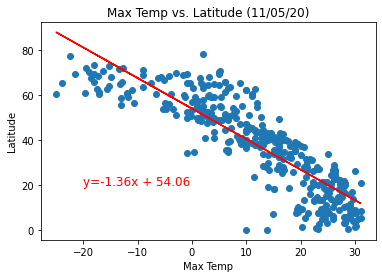

In [16]:
# Retrieve the Max Temp and Latitude for northern hemisphere
Northmax_temp = North_city_data.iloc[:,5]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of Max Temp vs. Latitude
N_slope, N_int, N_r, N_p, N_std_err = linregress(Northmax_temp, North_lat)
N_fit = N_slope * Northmax_temp + N_int
print(N_fit)

# Print the regression equation
North_equation =  f"y={round(N_slope, 2)}x + {round(N_int,2)}"
print(North_equation)

# Compute and print the correlation 
N_correlation = round(N_r**2 , 2)
print(f" Correlation = + {N_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
plt.plot(Northmax_temp, N_fit, color="red")
plt.annotate(North_equation,(-20,20), fontsize=12, color ="red")
plt.scatter(Northmax_temp, North_lat)

# Include the axes labels, plot title and date of analysis
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.title("Max Temp vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1     -33.650606
2     -17.364429
4     -47.884879
6     -42.503472
7     -16.693366
         ...    
527   -25.726903
531   -12.112072
533   -15.970683
536   -17.054707
543   -21.803767
Name: Max. Temp., Length: 168, dtype: float64
y=1.29x + (-48.96)
 Correlation = + 0.39


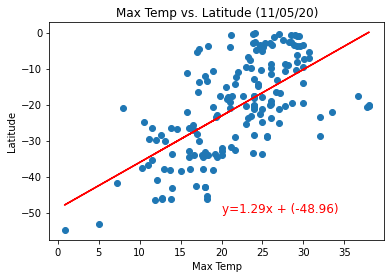

In [17]:
# Retrieve the Max Temp and latitude for southern hemisphere
Southmax_temp = South_city_data.iloc[:,5]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of Max Temp vs. Latitude
S_slope, S_int, S_r, S_p, S_std_err = linregress(Southmax_temp, South_lat)
S_fit = S_slope * Southmax_temp + S_int
print(S_fit)

# Print the regression equation
South_equation =  f"y={round(S_slope, 2)}x + ({round(S_int,2)})"
print(South_equation)

# Compute and print the correlation 
S_correlation = round(S_r**2 , 2)
print(f" Correlation = + {S_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(Southmax_temp, S_fit, color="red")
plt.annotate(South_equation,(20,-50), fontsize=12, color ="red")
plt.scatter(Southmax_temp, South_lat)
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.title("Max Temp vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      42.899118
3      39.526009
5      44.196468
11     39.785479
12     35.115021
         ...    
540    42.639648
541    34.855551
542    36.671840
544    26.552514
545    44.974877
Name: Humidity, Length: 378, dtype: float64
y=0.26x + 19.29
 Correlation = + 0.07


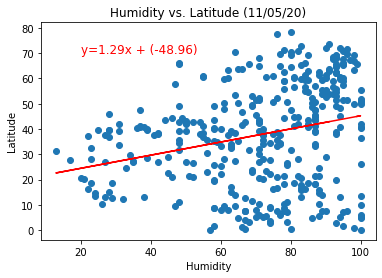

In [20]:
# Retrieve the humidity for northern hemisphere
North_city_data.head()
North_humidity = North_city_data.iloc[:,3]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of humidity vs. Latitude
NHL_slope, NHL_int, NHL_r, NHL_p, NHL_std_err = linregress(North_humidity, North_lat)
NHL_fit = NHL_slope * North_humidity + NHL_int
print(NHL_fit)

# Print the regression equation
NorthHL_equation =  f"y={round(NHL_slope, 2)}x + {round(NHL_int,2)}"
print(NorthHL_equation)

# Compute and print the correlation 
NHL_correlation = round(NHL_r**2 , 2)
print(f" Correlation = + {NHL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_humidity, NHL_fit, color="red")
plt.annotate(South_equation,(20,70), fontsize=12, color ="red")
plt.scatter(North_humidity, North_lat)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Humidity vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1     -22.047148
2     -18.570808
4     -18.136265
6     -20.743521
7     -26.537422
         ...    
527   -23.930166
531   -23.640471
533   -23.205929
536   -18.281113
543   -20.308978
Name: Humidity, Length: 168, dtype: float64
y=0.14x + (-30.88)
 Correlation = + 0.046


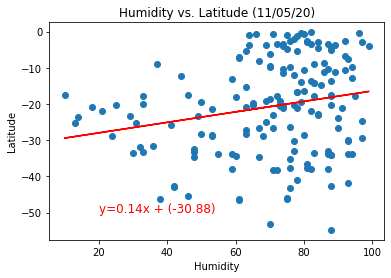

In [18]:
# Retrieve the humidity for northern hemisphere
South_city_data.head()
South_humidity = South_city_data.iloc[:,3]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of humidity vs. Latitude
SHL_slope, SHL_int, SHL_r, SHL_p, SHL_std_err = linregress(South_humidity, South_lat)
SHL_fit = SHL_slope * South_humidity + SHL_int
print(SHL_fit)

# Print the regression equation
SouthHL_equation =  f"y={round(SHL_slope, 2)}x + ({round(SHL_int,2)})"
print(SouthHL_equation)

# Compute and print the correlation 
SHL_correlation = round(SHL_r**2 , 3)
print(f" Correlation = + {SHL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(South_humidity, SHL_fit, color="red")
plt.annotate(SouthHL_equation,(20,-50), fontsize=12, color ="red")
plt.scatter(South_humidity, South_lat)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Humidity vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      32.239177
3      32.348359
5      43.157390
11     42.174751
12     41.082929
         ...    
540    32.239177
541    33.112634
542    41.410476
544    32.239177
545    43.157390
Name: Cloudiness, Length: 378, dtype: float64
y=0.11x + 32.24
 Correlation = + 0.05


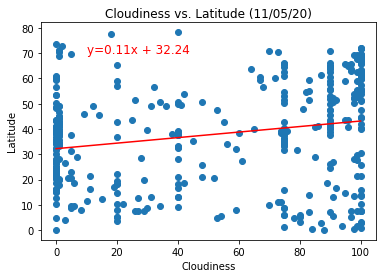

In [19]:
# Retrieve the cloudiness and Latitude for northern hemisphere
North_city_data.head()
North_cloud = North_city_data.iloc[:,8]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of cloudiness vs. Latitude
NCL_slope, NCL_int, NCL_r, NCL_p, NCL_std_err = linregress(North_cloud, North_lat)
NCL_fit = NCL_slope * North_cloud + NCL_int
print(NCL_fit)

# Print the regression equation
NorthCL_equation =  f"y={round(NCL_slope, 2)}x + {round(NCL_int,2)}"
print(NorthCL_equation)

# Compute and print the correlation 
NCL_correlation = round(NCL_r**2 , 2)
print(f" Correlation = + {NCL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_cloud, NCL_fit, color="red")
plt.annotate(NorthCL_equation,(10,70), fontsize=12, color ="red")
plt.scatter(North_cloud, North_lat)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1     -26.082798
2     -20.799617
4     -25.183533
6     -23.834636
7     -26.082798
         ...    
527   -25.970390
531   -25.408350
533   -25.633166
536   -14.841987
543   -23.047779
Name: Cloudiness, Length: 168, dtype: float64
y=0.11x + (-26.08)
 Correlation = + 0.05


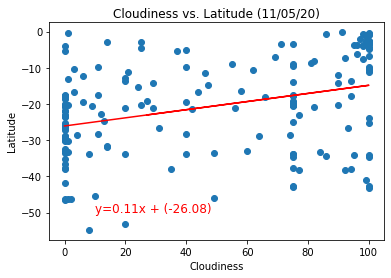

In [21]:
# Retrieve the cloudiness and Latitude for northern hemisphere
South_city_data.head()
South_cloud = South_city_data.iloc[:,8]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of cloudiness vs. Latitude
SCL_slope, SCL_int, SCL_r, SCL_p, SCL_std_err = linregress(South_cloud, South_lat)
SCL_fit = SCL_slope * South_cloud + SCL_int
print(SCL_fit)

# Print the regression equation
SouthCL_equation =  f"y={round(SCL_slope, 2)}x + ({round(SCL_int,2)})"
print(SouthCL_equation)

# Compute and print the correlation
SCL_correlation = round(SCL_r**2 , 2)
print(f" Correlation = + {NCL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.annotate(SouthCL_equation,(10,-50), fontsize=12, color ="red")
plt.plot(South_cloud, SCL_fit, color="red")
plt.scatter(South_cloud, South_lat)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      31.071698
3      46.682453
5      31.458741
11     54.216901
12     30.168596
         ...    
540    43.586105
541    37.961072
542    32.594069
544    38.425525
545    48.075810
Name: WindSpeed, Length: 378, dtype: float64
y=2.58x + 28.1
 Correlation = + 0.14


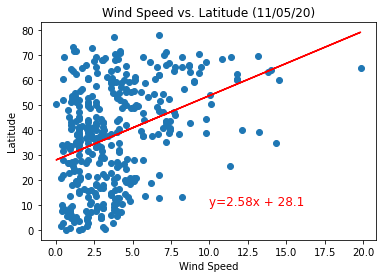

In [22]:
# Retrieve the wind speed and Latitude for northern hemisphere
North_city_data.head()
North_windspeed = North_city_data.iloc[:,7]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of wind speed vs. Latitude
NWL_slope, NWL_int, NWL_r, NWL_p, NWL_std_err = linregress(North_windspeed, North_lat)
NWL_fit = NWL_slope * North_windspeed + NWL_int
print(NWL_fit)

# Print the regression equation
NorthWL_equation =  f"y={round(NWL_slope, 2)}x + {round(NWL_int,2)}"
print(NorthWL_equation)

# Compute and print the correlation 
NWL_correlation = round(NWL_r**2 , 2)
print(f" Correlation = + {NWL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_windspeed, NWL_fit, color="red")
plt.annotate(NorthWL_equation,(10,10), fontsize=12, color ="red")
plt.scatter(North_windspeed, North_lat)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1     -21.699413
2     -20.567534
4     -17.309097
6     -18.166580
7     -21.802311
         ...    
527   -26.912913
531   -15.045340
533   -27.770396
536   -16.880355
543   -15.937123
Name: WindSpeed, Length: 168, dtype: float64
y=-1.71x + (-14.57)
 Correlation = + 0.1


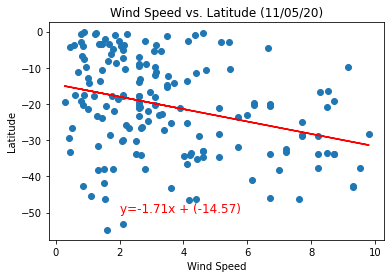

In [23]:
# Retrieve the wind speed and Latitude for southern hemisphere
South_city_data.head()
South_windspeed = South_city_data.iloc[:,7]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of wind speed vs. Latitude
SWL_slope, SWL_int, SWL_r, SWL_p, SWL_std_err = linregress(South_windspeed, South_lat)
SWL_fit = SWL_slope * South_windspeed + SWL_int
print(SWL_fit)

# Print the regression equation
SouthWL_equation =  f"y={round(SWL_slope, 2)}x + ({round(SWL_int,2)})"
print(SouthWL_equation)

# Compute and print the correlation 
SWL_correlation = round(SWL_r**2 , 2)
print(f" Correlation = + {SWL_correlation}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(South_windspeed, SWL_fit, color="red")
plt.annotate(SouthWL_equation,(2,-50), fontsize=12, color ="red")
plt.scatter(South_windspeed, South_lat)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure12.png")
plt.show()